<a href="https://colab.research.google.com/github/taran-aujla/ML-NN-genAi/blob/main/txt_to_img_%26_img_to_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.1 MB/s eta 0:00:00


In [3]:
!pip install transformers

In [74]:
!pip install Pillow

In [75]:
!pip install accelerate scipy safetensors

In [79]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Replace the model version with your required version if needed
pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
)

# Running the inference on GPU with cuda enabled
pipeline = pipeline.to('cuda')

prompt = " tigers fighting"

image = pipeline(prompt=prompt).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [80]:
image.show()

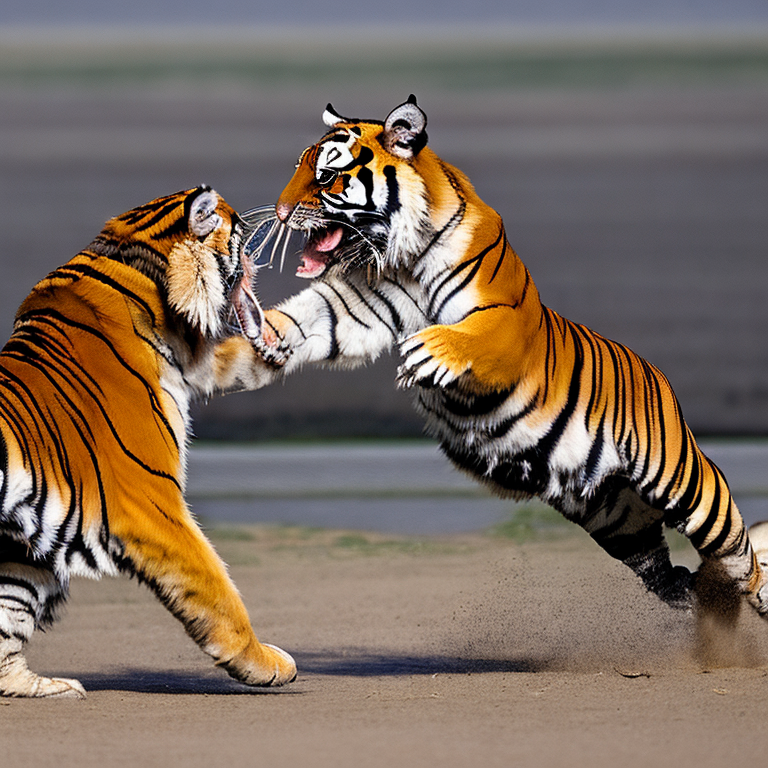

In [81]:
from IPython.display import display
display(image)

In [12]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to("cuda")

#hi there, taran this side. This CODE is only able to process url images not images stored in local storage
img_url = 'https://images.unsplash.com/photo-1658101093915-3f7e38ff487a?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8M3x8ZG9ncyUyMHBsYXlpbmd8ZW58MHx8MHx8fDA%3D'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


a photography of two dogs fighting on a patio with trees in the background
dogs fighting in a backyard with each other on a stone patio
